In [1]:
import yt
import matplotlib.pyplot  as plt
import numpy as np
import astropy

In [2]:
def get_yt_data_1d(filename):

    j_idx = 0
    k_idx = 0
    fields_list = ["x", "dens", "tele", "tion",
                   "pres", "temp", "cham", "targ", 
                   "velx", "ye", "magz"]

    data_yt = yt.load(filename)
    data_yt_map = data_yt.covering_grid(
        level=0, left_edge=[0, 0.0, 0.0], dims=data_yt.domain_dimensions
    )

    data_dict = {}
    for f in fields_list:
        data_dict[f] = data_yt_map[f][:,j_idx,k_idx]
    return data_dict

In [3]:
# filedir = '/Users/yao/sshfs_mesopsl_data/job.64739/'  # AMR_r2_dtmax_1e-12
filedir = [
    # '/Users/yao/sshfs_mesopsl_data/job.65665/',  # He, 40 mbar, diff_eleflcoef = 0.2
    # '/Users/yao/sshfs_mesopsl_data/job.65664/',  # He, 20 mbar, diff_eleflcoef = 0.2 
    # '/Users/yao/sshfs_mesopsl_data/job.65663/',  # He, 10 mbar, diff_eleflcoef = 0.2 
    # '/Users/yao/sshfs_mesopsl_data/job.65605/',  # He, 1 mbar, diff_eleflcoef = 0.2 
    # '/Users/yao/sshfs_mesopsl_data/job.65604/',  # He, 1 mbar, diff_eleflcoef = 1.0       
    # '/Users/yao/sshfs_mesopsl_data/job.65573/',  # He, 1 mbar, diff_eleflcoef = 0.1
    #        '/Users/yao/sshfs_mesopsl_data/job.64739/',  # AMR_r2_dtmax_1e-12
    #        '/Users/yao/sshfs_mesopsl_data/job.64751/',  # AMR_r3_dtmax_1e-13 & job.64750
    #        '/Users/yao/sshfs_mesopsl_data/job.64915/',  # AMR_r3 w/o dt_factors for diffusion and heatX
    #        '/Users/yao/sshfs_mesopsl_data/job.64960/',  # AMR_r3_dtmax_1e-13 & flux limiter e- being 1.0
    #        # '/Users/yao/sshfs_mesopsl_data/job.64935/',  # AMR_r3_dtmax_1e-13 & flux limiter e- being 0.06
            # '/Users/yao/sshfs_mesopsl_data/job.64935/',
            # '/Users/yao/sshfs_mesopsl_data/job.68477/'
    '/Users/yao/Desktop/Data/job.75632/', # v4.8 -> 1 pulse
#     '/Users/yao/Desktop/Data/job.75631/', # v4.8 -> 3 pulses
    # '/Users/yao/Desktop/Data/job.75715/', # v4.8 -> 5 pulses
    
          ] 

filename = 'lasslab_hdf5_chk_0020'  # check the mass fraction for the negative energy

In [4]:
data_yt = yt.load(filedir[0]+filename)
data_yt_map = data_yt.covering_grid(level=0, left_edge=[0, 0.0, 0.0], dims=data_yt.domain_dimensions)
time_now = np.array(data_yt.current_time)*1e9

yt : [INFO     ] 2024-07-05 14:00:15,847 Particle file found: lasslab_hdf5_chk_0020
yt : [INFO     ] 2024-07-05 14:00:15,877 Parameters: current_time              = 1.0000050153208865e-07
yt : [INFO     ] 2024-07-05 14:00:15,878 Parameters: domain_dimensions         = [128   1   1]
yt : [INFO     ] 2024-07-05 14:00:15,878 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-07-05 14:00:15,879 Parameters: domain_right_edge         = [5. 1. 1.]
yt : [INFO     ] 2024-07-05 14:00:15,879 Parameters: cosmological_simulation   = 0


In [5]:
data_yt.field_list

[('flash', 'absr'),
 ('flash', 'cham'),
 ('flash', 'cond'),
 ('flash', 'dbgs'),
 ('flash', 'dens'),
 ('flash', 'depo'),
 ('flash', 'dfcf'),
 ('flash', 'divb'),
 ('flash', 'eele'),
 ('flash', 'eint'),
 ('flash', 'eion'),
 ('flash', 'emis'),
 ('flash', 'ener'),
 ('flash', 'erad'),
 ('flash', 'fllm'),
 ('flash', 'gamc'),
 ('flash', 'game'),
 ('flash', 'lase'),
 ('flash', 'magp'),
 ('flash', 'magx'),
 ('flash', 'magy'),
 ('flash', 'magz'),
 ('flash', 'mgdc'),
 ('flash', 'mgxo'),
 ('flash', 'mgyo'),
 ('flash', 'pele'),
 ('flash', 'pion'),
 ('flash', 'pipe'),
 ('flash', 'prad'),
 ('flash', 'pres'),
 ('flash', 'r001'),
 ('flash', 'r002'),
 ('flash', 'r003'),
 ('flash', 'r004'),
 ('flash', 'r005'),
 ('flash', 'r006'),
 ('flash', 'r007'),
 ('flash', 'r008'),
 ('flash', 'r009'),
 ('flash', 'r010'),
 ('flash', 'r011'),
 ('flash', 'r012'),
 ('flash', 'r013'),
 ('flash', 'r014'),
 ('flash', 'r015'),
 ('flash', 'r016'),
 ('flash', 'r017'),
 ('flash', 'r018'),
 ('flash', 'r019'),
 ('flash', 'r020'),


In [6]:
x    = data_yt_map['x'][:,0,0]           # cm
dens = data_yt_map['density'][:,0,0]     # g/cm3
Te   = data_yt_map['tele'][:,0,0]        # K
Ti   = data_yt_map['tion'][:,0,0]        # K
Tr   = data_yt_map['trad'][:,0,0]        # K
depo = data_yt_map['depo'][:,0,0]        # K
cham = data_yt_map['cham'][:,0,0]        # 
targ = data_yt_map['targ'][:,0,0]        # 
velx = data_yt_map['velx'][:,0,0]        # 
ye = data_yt_map['ye'][:,0,0]        # 

In [7]:
data_dict = get_yt_data_1d(filedir[0]+filename)

yt : [INFO     ] 2024-07-05 14:00:36,806 Particle file found: lasslab_hdf5_chk_0020
yt : [INFO     ] 2024-07-05 14:00:36,831 Parameters: current_time              = 1.0000050153208865e-07
yt : [INFO     ] 2024-07-05 14:00:36,832 Parameters: domain_dimensions         = [128   1   1]
yt : [INFO     ] 2024-07-05 14:00:36,832 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-07-05 14:00:36,832 Parameters: domain_right_edge         = [5. 1. 1.]
yt : [INFO     ] 2024-07-05 14:00:36,833 Parameters: cosmological_simulation   = 0


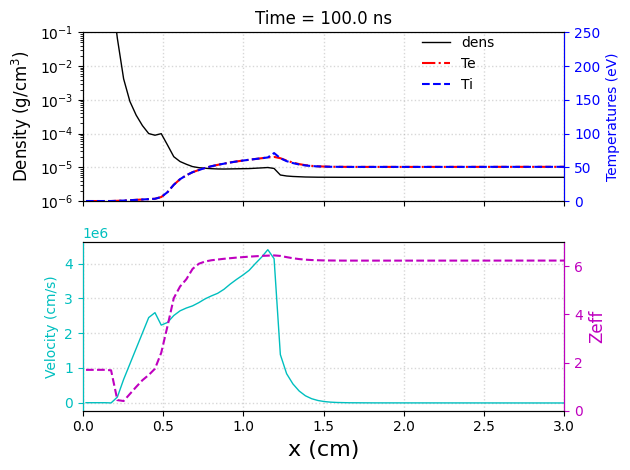

In [8]:
fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].semilogy(data_dict['x'], data_dict['dens'], '-k', lw=1.0)
axs[0].set_ylabel(r'Density (g/cm$^3$)', color='k', fontsize=12)
axs[0].tick_params(axis='y',color='k', labelcolor='k')
axs[0].set_ylim([1e-6,1e-1])
axs[0].set_xlim([0,3])
# axs[0].set_xlabel('x (cm)', fontsize=16)
axs[0].grid(which='major', alpha=0.5,linestyle=':', lw=1.0)

ax2 = axs[0].twinx()
ax2.plot(data_dict['x'], data_dict['tele']/11600, '-.r', label='Te', lw=1.5)
ax2.plot(data_dict['x'], data_dict['tion']/11600, '--b', label='Ti', lw=1.5)
ax2.set_ylabel('Temperatures (eV)', color='b', fontsize=10)
ax2.tick_params(axis='y', color='b', labelcolor='b')
ax2.spines['right'].set_color('b')
ax2.spines['left'].set_color('k')
ax2.set_ylim([0, 250])


fig.legend(['dens','Te','Ti'], 
           bbox_to_anchor=(0.8, 0.94),
           fontsize=10, 
           fancybox=False, 
           frameon=False)
axs[0].set_title('Time = {:.1f} ns'.format(time_now))

axs[1].plot(data_dict['x'], data_dict['velx'], '-c', lw=1.0)
axs[1].set_ylabel(r'Velocity (cm/s)', color='c', fontsize=10)
axs[1].tick_params(axis='y',color='c', labelcolor='c')
# axs[1].set_ylim([0,1e7])
# axs[1].set_xlim([0.0,1.5])
axs[1].set_xlabel('x (cm)', fontsize=16)
axs[1].grid(which='both', alpha=0.5,linestyle=':', lw=1.0)

ax3 = axs[1].twinx()
ax3.plot(data_dict['x'], data_dict['ye']*14, '--m', lw=1.5)
ax3.tick_params(axis='y', color='m', labelcolor='m')
ax3.set_ylabel('Zeff', color='m', fontsize=12)
ax3.spines['right'].set_color('m')
ax3.spines['left'].set_color('c')
ax3.set_ylim([0, 7])

# axs[2].plot(data_dict['x'], data_dict['magz']/1e4, '-r', lw=1.0)
# axs[2].set_ylabel(r'$B_z$ (T)', color='r', fontsize=10)
# axs[2].tick_params(axis='y',color='r', labelcolor='r')
# axs[2].set_xlabel('x (cm)', fontsize=12)
# axs[2].grid(which='both', alpha=0.5,linestyle=':', lw=1.0)

fig.tight_layout()

In [114]:
fig.savefig('/Users/yao/Desktop/one_pulse.pdf',dpi=600)

Text(0.5, 1.0, '1 pulses')

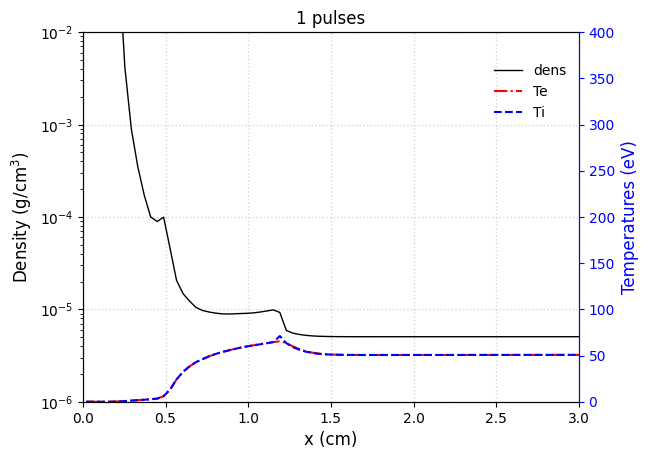

In [31]:
fig, axs = plt.subplots(1, 1, sharex=True)

axs.semilogy(data_dict['x'], data_dict['dens'], '-k', lw=1.0)
axs.set_ylabel(r'Density (g/cm$^3$)', color='k', fontsize=12)
axs.tick_params(axis='y',color='k', labelcolor='k')
axs.set_ylim([1e-6,1e-2])
axs.set_xlim([0,3])
axs.set_xlabel('x (cm)', fontsize=12)
axs.grid(which='major', alpha=0.5,linestyle=':', lw=1.0)

ax2 = axs.twinx()
ax2.plot(data_dict['x'], data_dict['tele']/11600, '-.r', label='Te', lw=1.5)
ax2.plot(data_dict['x'], data_dict['tion']/11600, '--b', label='Ti', lw=1.5)
ax2.set_ylabel('Temperatures (eV)', color='b', fontsize=12)
ax2.tick_params(axis='y', color='b', labelcolor='b')
ax2.spines['right'].set_color('b')
ax2.spines['left'].set_color('k')
ax2.set_ylim([0, 400])


fig.legend(['dens','Te','Ti'], 
           bbox_to_anchor=(0.9, 0.84),
           fontsize=10, 
           fancybox=False, 
           frameon=False)
# axs.set_title('Time = {:.1f} ns'.format(time_now))
axs.set_title('1 pulses')


In [32]:

fig.savefig('/Users/yao/Desktop/1_pulses.pdf',dpi=600)

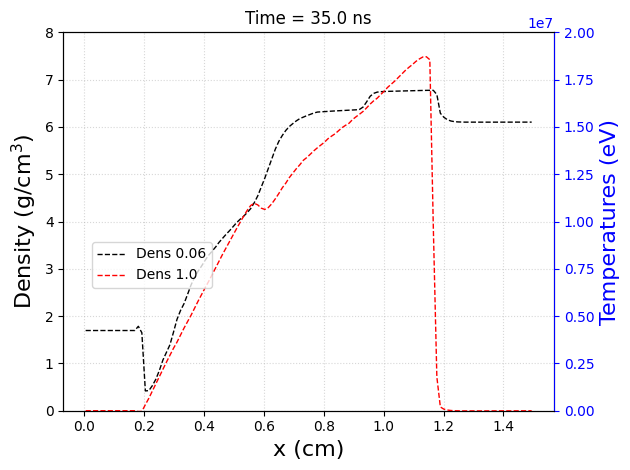

In [64]:
fig, ax1 = plt.subplots()

ax1.plot(x, ye*14, '--k', lw=1.0)
# ax1.semilogy(x2, dens2, '-k', lw=1.0)
# ax1.semilogy(x0, desn0, 'ok', lw=1.0)
ax1.set_ylabel(r'Density (g/cm$^3$)', color='k', fontsize=16)
ax1.tick_params(axis='y',color='k', labelcolor='k')
# ax1.legend()
ax1.set_ylim([0,8])
# ax1.set_xlim([0.2,1.5])
ax1.set_xlabel('x (cm)', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(x, velx, '--r', label='Te', lw=1.0)
# ax2.plot(x2, Te2/11600, '-r', label='Te', lw=1.0)
# ax2.plot(x0, Te0/11600, 'or', label='Te', lw=1.0)
# ax2.plot(x1, Ti1/11600, '--b', label='Ti', lw=1.0)
# ax2.plot(x2, Ti2/11600, '-b', label='Ti', lw=1.0)
# ax2.plot(x, Tr/11600, '--m', label='Tr', lw=3.0)
# ax2.plot(x0, Ti0/11600, 'ob', label='Ti', lw=1.0)
ax2.set_ylabel('Temperatures (eV)', color='b', fontsize=16)
ax2.tick_params(axis='y', color='b', labelcolor='b')
ax2.spines['right'].set_color('b')
ax2.spines['left'].set_color('k')
# ax2.set_ylim(bottom=0)
ax2.set_ylim([0, 2e7])
ax1.grid(alpha=0.5,linestyle=':')

fig.legend(['Dens 0.06', 'Dens 1.0', 'Te 0.06', 'Te 1.0', 'Ti 0.06', 'Ti 1.0' ], bbox_to_anchor=(0.35, 0.5),fontsize=10, )
ax1.set_title('Time = {:.1f} ns'.format(time_now))

fig.tight_layout()
# fig.savefig(filedir[2]+'profile_comp2_{:.1f}.png'.format(time_now),dpi=600)
# fig.savefig('/Users/yao/Desktop/fluxlimiter_dens_temps.pdf',dpi=600)

(0.0, 7.0)

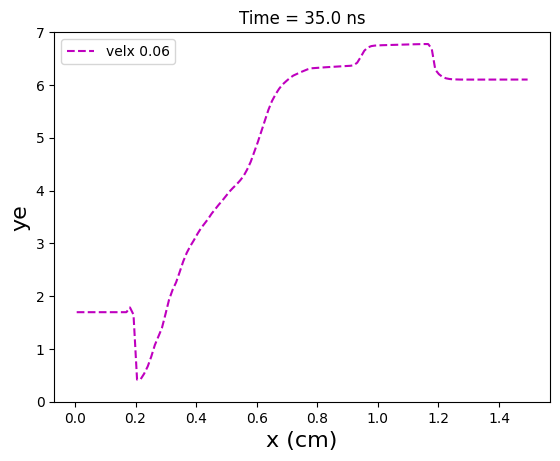

In [58]:
fig, ax1 = plt.subplots()

ax1.plot(x, ye*14, '--m', label='velx 0.06')
# ax1.plot(x2, velx2, '-m',  label='velx 1.0')
ax1.set_ylabel('ye', color='k', fontsize=16)
ax1.set_xlabel('x (cm)', fontsize=16)
ax1.set_title('Time = {:.1f} ns'.format(time_now))
ax1.legend(loc='best')
ax1.set_ylim([0,7])
# fig.savefig('/Users/yao/Desktop/fluxlimiter_velx.pdf',dpi=600)

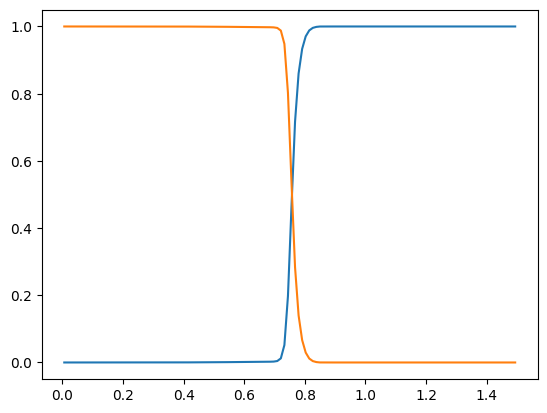

In [317]:
plt.plot(x, cham)
plt.plot(x, targ)

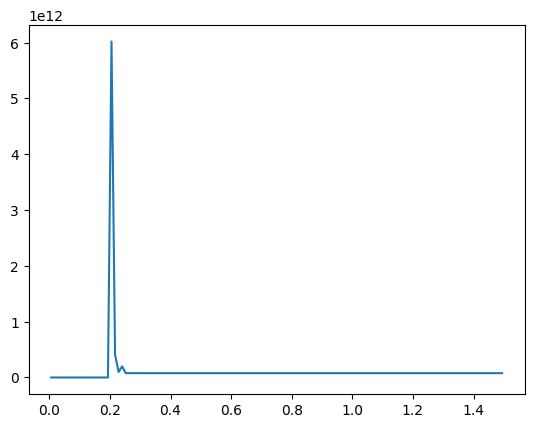

In [76]:
plt.plot(x,depo)

In [67]:
depo

unyt_array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 6.12472508e+12,
            7.27950819e+11, 5.04655970e+11, 6.79420690e+11,
            7.38636268e+11, 7.54405474e+11, 7.58797369e+11,
            7.59850664e+11, 7.60068375e+11, 7.60111038e+11,
            7.60121983e+11, 7.60127881e+11, 7.60132862e+11,
            7.60137777e+11, 7.60142561e+11, 7.60147345e+11,
            7.60152064e+11, 7.60156717e+11, 7.60161370e+11,
            7.60165892e+11, 7.60170480e+11, 7.60174936e+11,
            7.60179393e+11, 7.60183783e+11, 7.60188109e+11,
            7.60192434e+11, 7.60196694e+11, 7.60200888e+11,
            7.60205017e+11, 7.60209146e+11, 7.60213209e+11,
            7.60217207e+11, 7.60221204e+

In [10]:
me = 9.1e-31
mp = 1836*me
mi = 4*mp

In [117]:
5.6e-7 / (mi*1e3)

2.394120041178865e+16

In [118]:
filename = '/Users/yao/Desktop/Data/lasslab_hdf5_plt_cnt_1mbar/lasslab_hdf5_plt_cnt_0050'
data_yt = yt.load(filename)

yt : [INFO     ] 2024-02-19 15:29:59,798 Parameters: current_time              = 5.0003525780161985e-08
yt : [INFO     ] 2024-02-19 15:29:59,798 Parameters: domain_dimensions         = [128   1   1]
yt : [INFO     ] 2024-02-19 15:29:59,799 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-19 15:29:59,799 Parameters: domain_right_edge         = [1.5 1.  1. ]
yt : [INFO     ] 2024-02-19 15:29:59,800 Parameters: cosmological_simulation   = 0


In [119]:
filename = '/Users/yao/Desktop/Data/lasslab_hdf5_chk_0050'
data_yt = yt.load(filename)

yt : [INFO     ] 2024-02-19 15:30:13,039 Particle file found: lasslab_hdf5_chk_0050
yt : [INFO     ] 2024-02-19 15:30:13,067 Parameters: current_time              = 5.0003525780161985e-08
yt : [INFO     ] 2024-02-19 15:30:13,068 Parameters: domain_dimensions         = [128   1   1]
yt : [INFO     ] 2024-02-19 15:30:13,068 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-19 15:30:13,069 Parameters: domain_right_edge         = [1.5 1.  1. ]
yt : [INFO     ] 2024-02-19 15:30:13,069 Parameters: cosmological_simulation   = 0


In [124]:
data_yt.fields_detected

True

In [6]:
pressure_in_bar = 1e-3 # 10 mbar
kb = 1.4e-23           # J/K
T0 = 300               # K
pressure_in_Pa  = pressure_in_bar * 1e5
number_density  = pressure_in_Pa / (kb * T0)  # m^-3

In [7]:
number_density/1e6

2.3809523809523812e+16

In [11]:
rho = number_density * mp * 4 # kg/m^3
rho*1e-3 # g/cm^3

1.5912000000000004e-07

In [12]:
rho = number_density * mp * 1 # kg/m^3
rho*1e-3 # g/cm^3

3.978000000000001e-08

In [9]:
data_dict['dens']

unyt_array([2.19000000e+00, 2.19000000e+00, 2.19000092e+00,
            2.19571522e+00, 2.11178693e+00, 6.65097775e-02,
            4.18319334e-03, 8.97281874e-04, 3.51082334e-04,
            1.72110040e-04, 9.99647967e-05, 8.92504012e-05,
            9.93166134e-05, 4.57415808e-05, 2.06107108e-05,
            1.48218156e-05, 1.23164101e-05, 1.04854327e-05,
            9.73462818e-06, 9.36148345e-06, 9.10755129e-06,
            8.93680812e-06, 8.89240126e-06, 8.94914452e-06,
            8.98989726e-06, 9.05683827e-06, 9.16362819e-06,
            9.35738740e-06, 9.59865926e-06, 9.85504252e-06,
            9.24299600e-06, 5.91331975e-06, 5.52443778e-06,
            5.34756052e-06, 5.23194440e-06, 5.15600817e-06,
            5.11123479e-06, 5.08460523e-06, 5.06943504e-06,
            5.06084992e-06, 5.05611645e-06, 5.05351812e-06,
            5.05209026e-06, 5.05135763e-06, 5.05094164e-06,
            5.05074517e-06, 5.05062947e-06, 5.05056850e-06,
            5.05053753e-06, 5.05053389e-